c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


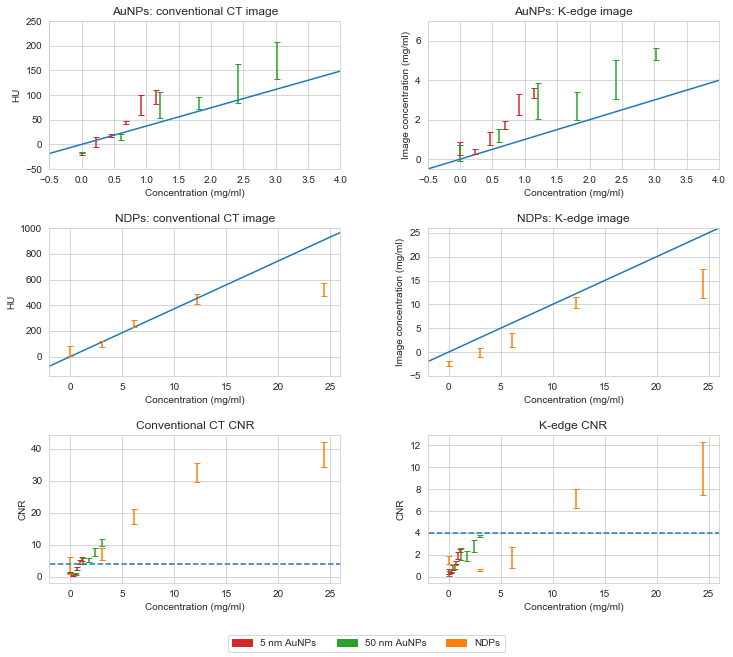

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder2 = 'phantom_scan_2'  # 5 nm
folder3 = 'phantom_scan_3'  # 50 nm
folder5 = 'phantom_scan_5'  # NDP

concentrations2 = [1.143, 0.914, 0.686, 0.457, 0.229, 0]
concentrations3 = [3.020, 2.416, 1.812, 1.208, 0.604, 0]
concentrations5 = [24.46, 12.23, 6.12, 3.06, 0]

# Get the values of the 19.67 mg/ml vial in the standard image
norm_ct = np.load(os.path.join(directory, 'phantom_scan_1', 'Norm CT', 'CT_norm.npy'))
contrast_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'contrast_masks_Au.npy'))
water_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'water_mask.npy'))

hu_high = np.zeros((3, 4))
for i in range(3):
    for j in range(4):
        hu_high[i, j] = np.nanmean(norm_ct[i, j+11]*contrast_norm[0])

hu_high = np.mean(hu_high, axis=1)

# Load the image data for all group
ct2 = np.load(os.path.join(directory, folder2, 'Norm CT', 'CT_norm.npy'))[:, 11:15]
k_au2 = np.load(os.path.join(directory, folder2, 'Norm CT', 'K-edge_Au.npy'))[11:15]

ct3 = np.load(os.path.join(directory, folder3, 'Norm CT', 'CT_norm.npy'))[:, 11:15]
k_au3 = np.load(os.path.join(directory, folder3, 'Norm CT', 'K-edge_Au.npy'))[11:15]

ct5 = np.load(os.path.join(directory, folder5, 'Norm CT', 'CT_norm.npy'))[:, 11:15]
k_au5 = np.load(os.path.join(directory, folder5, 'Norm CT', 'K-edge_Au.npy'))[11:15]

# Load the contrast masks
cont_np2 = np.load(os.path.join(directory, folder2, 'contrast_masks_Au.npy'))
water_np2 = np.load(os.path.join(directory, folder2, 'water_mask.npy'))
hu_vals2 = np.zeros((4, 3, 2, 6)) # Slice, Bin, Mean value cnr of each of the vials from all 4 slices
k_vals2 = np.zeros((4, 2, 6))

cont_np3 = np.load(os.path.join(directory, folder3, 'contrast_masks_Au.npy'))
water_np3 = np.load(os.path.join(directory, folder3, 'water_mask.npy'))
hu_vals3 = np.zeros((4, 3, 2, 6)) # Slice, Bin, Mean value cnr of each of the vials from all 4 slices
k_vals3 = np.zeros((4, 2, 6))

cont_np5 = np.load(os.path.join(directory, folder5, 'contrast_masks_Au.npy'))
water_np5 = np.load(os.path.join(directory, folder5, 'water_mask.npy'))
hu_vals5 = np.zeros((4, 3, 2, 5)) # Slice, Bin, Mean value cnr of each of the vials from all 4 slices
k_vals5 = np.zeros((4, 2, 5))


# Calculate the HU vals for each of the contrast vials
for i in range(3):
    for z in range(4):
        water_ct2 = ct2[i, z]*water_np2
        water_ct3 = ct3[i, z]*water_np3

        for j in range(6):
            # CT image
            temp_ct2 = ct2[i, z]*cont_np2[j, z]
            hu_vals2[z, i, 0, j] = np.nanmean(temp_ct2)
            hu_vals2[z, i, 1, j] = np.abs(hu_vals2[z, i, 0, j] - np.nanmean(water_ct2)) / np.nanstd(water_ct2)

            temp_ct3 = ct3[i, z]*cont_np3[j, z]
            hu_vals3[z, i, 0, j] = np.nanmean(temp_ct3)
            hu_vals3[z, i, 1, j] = np.abs(hu_vals3[z, i, 0, j] - np.nanmean(water_ct3)) / np.nanstd(water_ct3)

# Same for the K-edge data
for z in range(4):
    for j in range(6):
        temp_k2 = k_au2[z]*cont_np2[j, z]
        water_k2 = k_au2[z]*water_np2
        k_vals2[z, 0, j] = np.nanmean(temp_k2)
        k_vals2[z, 1, j] = np.abs(k_vals2[z, 0, j] - np.nanmean(water_k2)) / np.nanstd(water_k2)

        temp_k3 = k_au3[z]*cont_np3[j, z]
        water_k3 = k_au3[z]*water_np3
        k_vals3[z, 0, j] = np.nanmean(temp_k3)
        k_vals3[z, 1, j] = np.abs(k_vals3[z, 0, j] - np.nanmean(water_k3)) / np.nanstd(water_k3)

# Calculate the HU vals for each of the NDP vials
for i in range(3):
    for z in range(4):
        water_ct5 = ct5[i, z]*water_np5

        for j in range(5):
            # CT image
            temp_ct5 = ct5[i, z]*cont_np5[j, z]
            hu_vals5[z, i, 0, j] = np.nanmean(temp_ct5)
            hu_vals5[z, i, 1, j] = np.abs(hu_vals5[z, i, 0, j] - np.nanmean(water_ct5)) / np.nanstd(water_ct5)

# Same for the K-edge data
for z in range(4):
    for j in range(5):
        temp_k5 = k_au5[z]*cont_np5[j, z]
        water_k5 = k_au5[z]*water_np5
        k_vals5[z, 0, j] = np.nanmean(temp_k5)
        k_vals5[z, 1, j] = np.abs(k_vals5[z, 0, j] - np.nanmean(water_k5)) / np.nanstd(water_k5)

# Take mean and std over the slice data
hu_vals2_std = np.std(hu_vals2, axis=0)
hu_vals2 = np.mean(hu_vals2, axis=0)
k_vals2_std = np.std(k_vals2, axis=0)
k_vals2 = np.mean(k_vals2, axis=0)

hu_vals3_std = np.std(hu_vals3, axis=0)
hu_vals3 = np.mean(hu_vals3, axis=0)
k_vals3_std = np.std(k_vals3, axis=0)
k_vals3 = np.mean(k_vals3, axis=0)

hu_vals5_std = np.std(hu_vals5, axis=0)
hu_vals5 = np.mean(hu_vals5, axis=0)
k_vals5_std = np.std(k_vals5, axis=0)
k_vals5 = np.mean(k_vals5, axis=0)


xpts = np.linspace(-5, 30, 500)

# K-edge data should follow a 1-to-1 line
ypts_k = np.linspace(-5, 30, 500)

# HU data will have slope (HU)/high concentration
ypts_hu_sum = hu_high[2]/19.67 * xpts
ypts_hu_high = hu_high[1]/19.67 * xpts

# ypts_hu_sum = hu_vals2[2, 0, 0]/concentrations2[0] * xpts
# ypts_hu_high = hu_vals2[1, 0, 0]/concentrations2[0] * xpts
#
# ypts_hu_sum = hu_vals3[2, 0, 0]/concentrations3[0] * xpts
# ypts_hu_high = hu_vals3[1, 0, 0]/concentrations3[0] * xpts
#
# ypts_hu_sum5 = hu_vals5[2, 0, 0]/concentrations5[0] * xpts
# ypts_hu_high5 = hu_vals5[1, 0, 0]/concentrations5[0] * xpts


sns.set_style('whitegrid')
fig4, ax4 = plt.subplots(3, 2, figsize=(12, 10))
ax4[0, 0].plot(xpts, ypts_hu_sum, color='#1f77b4')
ax4[0, 0].errorbar(concentrations2, hu_vals2[2, 0], yerr=hu_vals2_std[2, 0], fmt='none', capsize=3, color='C3')
ax4[0, 0].errorbar(concentrations3, hu_vals3[2, 0], yerr=hu_vals3_std[2, 0], fmt='none', capsize=3, color='C2')
ax4[0, 0].set_title('AuNPs: conventional CT image')
ax4[0, 0].set_xlabel('Concentration (mg/ml)')
ax4[0, 0].set_ylabel('HU')
ax4[0, 0].set_xlim([-0.5, 4])
ax4[0, 0].set_ylim([-50, 250])

# ax4[0, 1].plot(xpts, ypts_hu_high)
# ax4[0, 1].errorbar(concentrations2, hu_vals2[1, 0], yerr=hu_vals2_std[1, 0], fmt='none', capsize=3)
# ax4[0, 1].errorbar(concentrations3, hu_vals3[1, 0], yerr=hu_vals3_std[1, 0], fmt='none', capsize=3)
# ax4[0, 1].errorbar(concentrations5, hu_vals5[1, 0], yerr=hu_vals5_std[1, 0], fmt='none', capsize=3)
# ax4[0, 1].set_title('Image with only 81-97 keV x-rays')
# ax4[0, 1].set_xlabel('Concentration (mg/ml)')
# ax4[0, 1].set_ylabel('HU')
# ax4[0, 1].set_xlim([-2, 30])
# ax4[0, 1].set_ylim([-150, 1300])

ax4[0, 1].plot(xpts, ypts_k, color='#1f77b4')
ax4[0, 1].errorbar(concentrations2, k_vals2[0], yerr=k_vals2_std[0], fmt='none', capsize=3, color='C3')
ax4[0, 1].errorbar(concentrations3, k_vals3[0], yerr=k_vals3_std[0], fmt='none', capsize=3, color='C2')
ax4[0, 1].set_title('AuNPs: K-edge image')
ax4[0, 1].set_xlabel('Concentration (mg/ml)')
ax4[0, 1].set_ylabel('Image concentration (mg/ml)')
ax4[0, 1].set_xlim([-0.5, 4])
ax4[0, 1].set_ylim([-0.5, 7])

ax4[1, 0].plot(xpts, ypts_hu_sum, color='C0')
ax4[1, 0].errorbar(concentrations5, hu_vals5[2, 0], yerr=hu_vals5_std[2, 0], fmt='none', capsize=3, color='C1')
ax4[1, 0].set_title('NDPs: conventional CT image')
ax4[1, 0].set_xlabel('Concentration (mg/ml)')
ax4[1, 0].set_ylabel('HU')
ax4[1, 0].set_xlim([-2, 26])
ax4[1, 0].set_ylim([-150, 1000])

ax4[1, 1].plot(xpts, ypts_k, color='C0')
ax4[1, 1].errorbar(concentrations5, k_vals5[0], yerr=k_vals5_std[0], fmt='none', capsize=3, color='C1')
ax4[1, 1].set_title('NDPs: K-edge image')
ax4[1, 1].set_xlabel('Concentration (mg/ml)')
ax4[1, 1].set_ylabel('Image concentration (mg/ml)')
ax4[1, 1].set_xlim([-2, 26])
ax4[1, 1].set_ylim([-5, 26])

rose = np.ones(len(xpts))*4
ax4[2, 0].errorbar(concentrations2, hu_vals2[2, 1], yerr=hu_vals2_std[2, 1], fmt='none', capsize=3, color='C3')
ax4[2, 0].errorbar(concentrations3, hu_vals3[2, 1], yerr=hu_vals3_std[2, 1], fmt='none', capsize=3, color='C2')
ax4[2, 0].errorbar(concentrations5, hu_vals5[2, 1], yerr=hu_vals5_std[2, 1], fmt='none', capsize=3, color='C1')
ax4[2, 0].plot(xpts, rose, color='C0', ls='--', lw=1.5)
ax4[2, 0].set_xlim([-2, 26])
ax4[2, 0].set_title('Conventional CT CNR')
ax4[2, 0].set_ylabel('CNR')
ax4[2, 0].set_xlabel('Concentration (mg/ml)')

# ax4[1, 1].errorbar(concentrations2, hu_vals2[1, 1], yerr=hu_vals2_std[1, 1], fmt='none', capsize=3)
# ax4[1, 1].errorbar(concentrations3, hu_vals3[1, 1], yerr=hu_vals3_std[1, 1], fmt='none', capsize=3)
# ax4[1, 1].errorbar(concentrations5, hu_vals5[1, 1], yerr=hu_vals5_std[1, 1], fmt='none', capsize=3)
# ax4[1, 1].plot(xpts, rose, color='red', ls='--')
# ax4[1, 1].set_xlim([-2, 30])
# ax4[1, 1].set_title('81-97 keV CNR')
# ax4[1, 1].set_ylabel('CNR')
# ax4[1, 1].set_xlabel('Concentration (mg/ml)')

ax4[2, 1].errorbar(concentrations2, k_vals2[1], yerr=k_vals2_std[1], fmt='none', capsize=3, color='C3')
ax4[2, 1].errorbar(concentrations3, k_vals3[1], yerr=k_vals3_std[1], fmt='none', capsize=3, color='C2')
ax4[2, 1].errorbar(concentrations5, k_vals5[1], yerr=k_vals5_std[1], fmt='none', capsize=3, color='C1')
ax4[2, 1].plot(xpts, rose, color='C0', ls='--', lw=1.5)
ax4[2, 1].set_xlim([-2, 26])
ax4[2, 1].set_title('K-edge CNR')
ax4[2, 1].set_ylabel('CNR')
ax4[2, 1].set_xlabel('Concentration (mg/ml)')

c3patch = mpatches.Patch(color='C3', label='5 nm AuNPs')
c2patch = mpatches.Patch(color='C2', label='50 nm AuNPs')
c1patch = mpatches.Patch(color='C1', label='NDPs')
fig4.legend(handles=[c3patch, c2patch, c1patch], loc='lower center', ncol=3, fancybox=True)

fig4.subplots_adjust(wspace=0.3, hspace=0.4, bottom=0.1)
fig4.show()
fig4.savefig(r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs\200ul_plots.png',
             dpi=500)

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


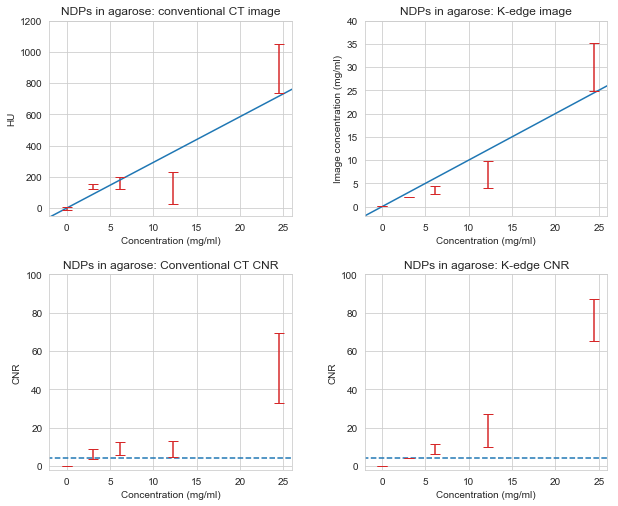

In [2]:
directory = r'D:\OneDrive - University of Victoria\Research\LDA Data'
folder5 = r'21-03-11_CT_AuNPs\phantom_scan_12'  # NDP

concentrations5 = [24.46, 12.23, 6.12, 3.06, 0]

# Get the values of the 19.67 mg/ml vial in the standard image
norm_ct = np.load(os.path.join(directory, '21-03-24_CT_NP_nophantom_normalization_ring_corr' ,'phantom_scan', 'Norm CT', 'CT_norm.npy'))
contrast_norm = np.load(os.path.join(directory, '21-03-24_CT_NP_nophantom_normalization_ring_corr', 'phantom_scan', 'contrast_masks_Au.npy'))
water_norm = np.load(os.path.join(directory, '21-03-24_CT_NP_nophantom_normalization_ring_corr', 'phantom_scan', 'water_mask.npy'))

hu_high = np.zeros((3, 4))
for i in range(3):
    for j in range(4):
        hu_high[i, j] = np.nanmean(norm_ct[i, j+11]*contrast_norm[0])

hu_high = np.mean(hu_high, axis=1)

# Load the image data for all group
ct5 = np.load(os.path.join(directory, folder5, 'Norm CT', 'CT_norm.npy'))[:, 9:15]
k_au5 = np.load(os.path.join(directory, folder5, 'Norm CT', 'K-edge_Au.npy'))[9:15]
k_au5[k_au5 < 0] = 0

# Load the contrast masks
cont_np5 = np.load(os.path.join(directory, folder5, 'contrast_masks_Au.npy'))[:, 2:-2]
water_np5 = np.load(os.path.join(directory, folder5, 'water_mask.npy'))
hu_vals5 = np.zeros((6, 3, 2, 5)) # Slice, Bin, Mean value cnr of each of the vials from all 4 slices
k_vals5 = np.zeros((6, 2, 5))

# Calculate the HU vals for each of the NDP vials
for i in range(3):
    for z in range(6): # Slices
        water_ct5 = ct5[i, z]*cont_np5[-1, z]

        for j in range(5):
            # CT image
            temp_ct5 = ct5[i, z]*cont_np5[j, z]
            hu_vals5[z, i, 0, j] = np.nanmean(temp_ct5)
            hu_vals5[z, i, 1, j] = np.abs(hu_vals5[z, i, 0, j] - np.nanmean(water_ct5)) / np.nanstd(water_ct5)

# Same for the K-edge data
for z in range(6):  # Slices
    for j in range(5):
        temp_k5 = k_au5[z]*cont_np5[j, z]
        water_k5 = k_au5[z]*cont_np5[-1, z]
        k_vals5[z, 0, j] = np.nanmean(temp_k5)
        k_vals5[z, 1, j] = np.abs(k_vals5[z, 0, j] - np.nanmean(water_k5)) / np.nanstd(water_k5)

# for i in range(5):
#     print(f'Vial {i}, CT')
#     print(hu_vals5[:, 2, 0, i])
#     print(hu_vals5[:, 2, 1, i])
#     print(f'Vial {i}, K-edge')
#     print(k_vals5[:, 0, i])
#     print(k_vals5[:, 1, i])
#     print()
#     print()
#     print()

# Take mean and std over the slice data
hu_vals5_std = np.nanstd(hu_vals5, axis=0)
hu_vals5 = np.nanmean(hu_vals5, axis=0)
k_vals5_std = np.nanstd(k_vals5[1:], axis=0)
k_vals5 = np.nanmean(k_vals5[1:], axis=0)

xpts = np.linspace(-5, 30, 500)

# K-edge data should follow a 1-to-1 line
ypts_k = np.linspace(-5, 30, 500)

# HU data will have slope (HU)/high concentration
ypts_hu_sum = hu_high[2]/19.67 * xpts
ypts_hu_high = hu_high[1]/19.67 * xpts

# ypts_hu_sum5 = hu_vals5[2, 0, 0]/concentrations5[0] * xpts
# ypts_hu_high5 = hu_vals5[1, 0, 0]/concentrations5[0] * xpts

sns.set_style('whitegrid')
fig5, ax5 = plt.subplots(2, 2, figsize=(10, 8))
ax5[0, 0].plot(xpts, ypts_hu_sum, color='#1f77b4')
ax5[0, 0].errorbar(concentrations5, hu_vals5[2, 0], yerr=hu_vals5_std[2, 0], fmt='none', capsize=5, color='C3')
ax5[0, 0].set_title('NDPs in agarose: conventional CT image')
ax5[0, 0].set_xlabel('Concentration (mg/ml)')
ax5[0, 0].set_ylabel('HU')
ax5[0, 0].set_xlim([-2, 26])
ax5[0, 0].set_ylim([-50, 1200])

ax5[0, 1].plot(xpts, ypts_k, color='#1f77b4')
ax5[0, 1].errorbar(concentrations5, k_vals5[0], yerr=k_vals5_std[0], fmt='none', capsize=5, color='C3')
ax5[0, 1].set_title('NDPs in agarose: K-edge image')
ax5[0, 1].set_xlabel('Concentration (mg/ml)')
ax5[0, 1].set_ylabel('Image concentration (mg/ml)')
ax5[0, 1].set_xlim([-2, 26])
ax5[0, 1].set_ylim([-2, 40])


rose = np.ones(len(xpts))*4
ax5[1, 0].plot(xpts, rose, color='C0', ls='--', lw=1.5)
ax5[1, 0].errorbar(concentrations5, hu_vals5[2, 1], yerr=hu_vals5_std[2, 1], fmt='none', capsize=5, color='C3')
ax5[1, 0].set_xlim([-2, 26])
ax5[1, 0].set_ylim([-2, 100])
ax5[1, 0].set_title('NDPs in agarose: Conventional CT CNR')
ax5[1, 0].set_ylabel('CNR')
ax5[1, 0].set_xlabel('Concentration (mg/ml)')

ax5[1, 1].plot(xpts, rose, color='C0', ls='--', lw=1.5)
ax5[1, 1].errorbar(concentrations5, k_vals5[1], yerr=k_vals5_std[1], fmt='none', capsize=5, color='C3')
ax5[1, 1].set_xlim([-2, 26])
ax5[1, 1].set_ylim([-2, 100])
ax5[1, 1].set_title('NDPs in agarose: K-edge CNR')
ax5[1, 1].set_ylabel('CNR')
ax5[1, 1].set_xlabel('Concentration (mg/ml)')

fig5.subplots_adjust(wspace=0.3, hspace=0.3, bottom=0.1)
fig5.show()
fig5.savefig(r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs\NDP_agarose_plots.png',
             dpi=500)


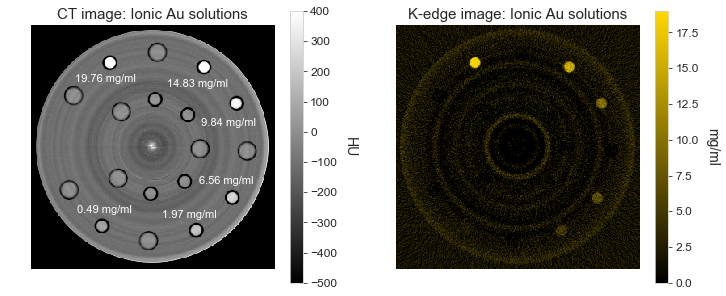

In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder1 = 'phantom_scan_1'  # Regular image

ct = np.load(os.path.join(directory, folder1, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder1, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'Ionic Au solutions'

# A good slice
z = 12

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:440, 138:440], cmap='gray', vmin=-500, vmax=400)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)
ax[0].annotate('19.76 mg/ml', (0.18, 0.78), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('14.83 mg/ml', (0.56, 0.76), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('9.84 mg/ml', (0.7, 0.6), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('6.56 mg/ml', (0.69, 0.36), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('1.97 mg/ml', (0.54, 0.22), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0.49 mg/ml', (0.19, 0.24), color='white',
             xycoords='axes fraction', va='center', fontsize=11)


im1 = ax[1].imshow(kct[z, 138:440, 138:440], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}.png'), dpi=500)

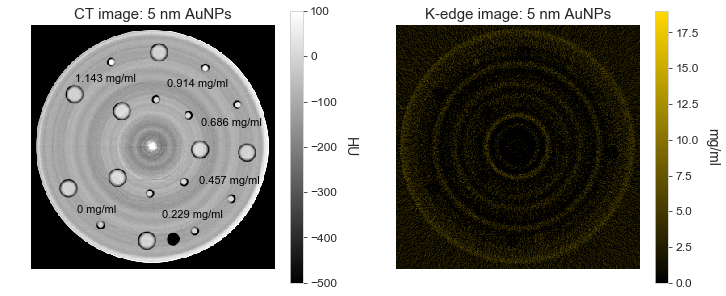

In [80]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder2 = 'phantom_scan_2'  # 5 nm

ct = np.load(os.path.join(directory, folder2, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder2, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'5 nm AuNPs'

# A good slice
z = 12

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:440, 138:440], cmap='gray', vmin=-500, vmax=100)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)
ax[0].annotate('1.143 mg/ml', (0.18, 0.78), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0.914 mg/ml', (0.56, 0.76), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0.686 mg/ml', (0.7, 0.6), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0.457 mg/ml', (0.69, 0.36), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0.229 mg/ml', (0.54, 0.22), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0 mg/ml', (0.19, 0.24), color='black',
             xycoords='axes fraction', va='center', fontsize=11)

im1 = ax[1].imshow(kct[z, 138:440, 138:440], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}.png'), dpi=500)

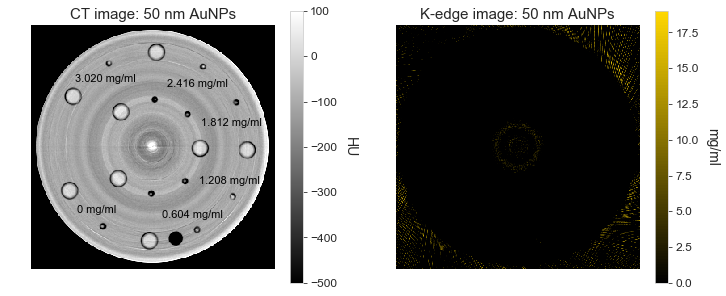

In [111]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder3 = 'phantom_scan_3'  # 50 nm

ct = np.load(os.path.join(directory, folder3, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder3, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'50 nm AuNPs'

# A good slice
z = 15

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:440, 138:440], cmap='gray', vmin=-500, vmax=100)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)
ax[0].annotate('3.020 mg/ml', (0.18, 0.78), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('2.416 mg/ml', (0.56, 0.76), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('1.812 mg/ml', (0.7, 0.6), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('1.208 mg/ml', (0.69, 0.36), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0.604 mg/ml', (0.54, 0.22), color='black',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0 mg/ml', (0.19, 0.24), color='black',
             xycoords='axes fraction', va='center', fontsize=11)

im1 = ax[1].imshow(kct[z, 138:440, 138:440], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}_slice{z}.png'), dpi=500)

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


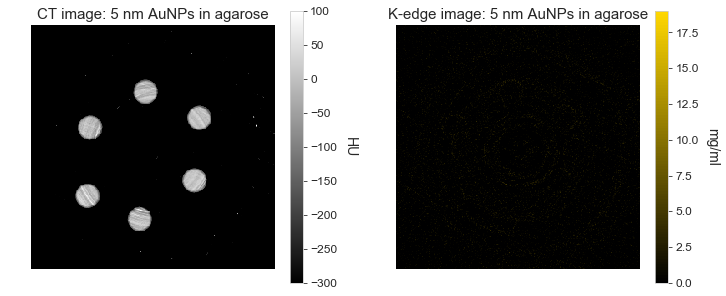

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder9 = 'phantom_scan_9'  # 5 nm in agarose

ct = np.load(os.path.join(directory, folder9, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder9, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'5 nm AuNPs in agarose'

# A good slice
z = 12

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:430, 138:430], cmap='gray', vmin=-300, vmax=100)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)

im1 = ax[1].imshow(kct[z, 138:430, 138:430], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}.png'), dpi=500)

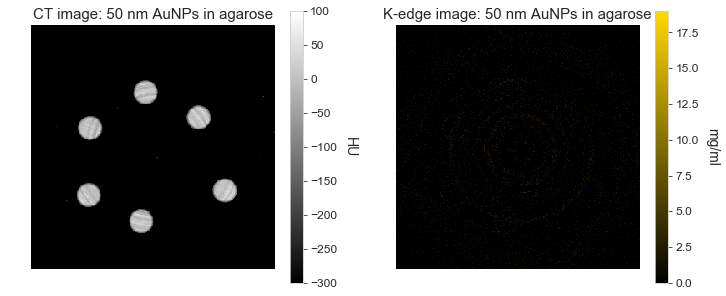

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder6 = 'phantom_scan_6'  # 50 nm in agarose

ct = np.load(os.path.join(directory, folder6, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder6, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'50 nm AuNPs in agarose'

# A good slice
z = 12

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:430, 138:430], cmap='gray', vmin=-300, vmax=100)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)

im1 = ax[1].imshow(kct[z, 138:430, 138:430], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}.png'), dpi=500)

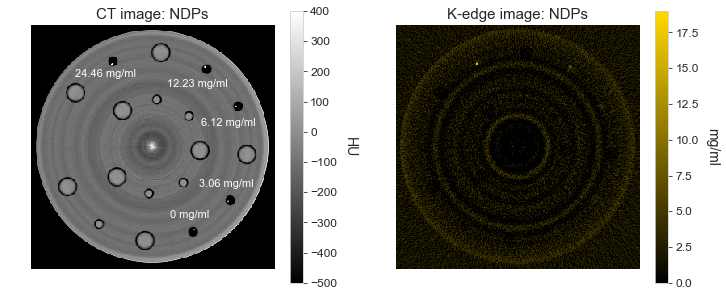

In [85]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder5 = 'phantom_scan_5'  # NDP

ct = np.load(os.path.join(directory, folder5, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder5, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'NDPs'

# A good slice
z = 12

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:440, 138:440], cmap='gray', vmin=-500, vmax=400)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)
ax[0].annotate('24.46 mg/ml', (0.18, 0.80), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('12.23 mg/ml', (0.56, 0.76), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('6.12 mg/ml', (0.7, 0.6), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('3.06 mg/ml', (0.69, 0.35), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0 mg/ml', (0.57, 0.22), color='white',
             xycoords='axes fraction', va='center', fontsize=11)

im1 = ax[1].imshow(kct[z, 138:440, 138:440], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}.png'), dpi=500)


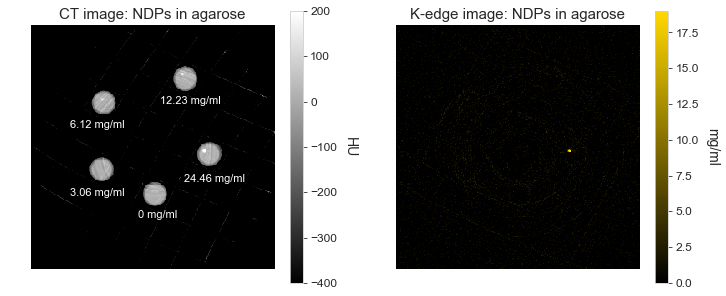

In [107]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder12 = 'phantom_scan_12'  # NDP in agarose

ct = np.load(os.path.join(directory, folder12, 'Norm CT', 'CT_norm.npy'))[2]
kct = np.load(os.path.join(directory, folder12, 'Norm CT', 'K-edge_Au.npy'))
kct[kct < 0] = 0  # Can't have negative concentrations

# Name
name = f'NDPs in agarose'

# A good slice
z = 14

# Creat gold colormap
nbins = 100
c3 = (1, 0.843, 0)
gray_val = 0
gray_list = (gray_val, gray_val, gray_val)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].axis('off')
ax[1].axis('off')

im0 = ax[0].imshow(ct[z, 138:430, 138:430], cmap='gray', vmin=-400, vmax=200)
ax[0].set_title(f'CT image: {name}', fontsize=15)
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar0.ax.set_ylabel('HU', fontsize=14, labelpad=20, rotation=-90)
cbar0.ax.tick_params(labelsize=12)
ax[0].annotate('3.06 mg/ml', (0.16, 0.31), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('6.12 mg/ml', (0.16, 0.59), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('12.23 mg/ml', (0.53, 0.69), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('24.46 mg/ml', (0.63, 0.37), color='white',
             xycoords='axes fraction', va='center', fontsize=11)
ax[0].annotate('0 mg/ml', (0.44, 0.22), color='white',
             xycoords='axes fraction', va='center', fontsize=11)

im1 = ax[1].imshow(kct[z, 138:430, 138:430], cmap=cmap2, vmin=0, vmax=19)
ax[1].set_title(f'K-edge image: {name}', fontsize=15)
cbar1 = fig.colorbar(im1, ax=ax[1])
cbar1.ax.set_ylabel('mg/ml', fontsize=14, labelpad=20, rotation=-90)
cbar1.ax.tick_params(labelsize=12)
fig.show()
fig.savefig(os.path.join(directory, f'{name}_slice{z}.png'), dpi=500)